## Kubełkowanie - Binning

### Histogram o stałej szerokości

In [4]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'value': np.random.randint(0,100,20)})
df

,value
0,40
1,72
2,71
3,94
4,18
5,4
6,36
7,7
8,85
9,34


In [5]:
df.shape

(20, 1)

In [6]:
pd.cut(df.value, range(0,105, 10), right=False)

0      [40, 50)
1      [70, 80)
2      [70, 80)
3     [90, 100)
4      [10, 20)
5       [0, 10)
6      [30, 40)
7       [0, 10)
8      [80, 90)
9      [30, 40)
10     [40, 50)
11      [0, 10)
12     [20, 30)
13     [10, 20)
14     [60, 70)
15     [50, 60)
16     [40, 50)
17     [60, 70)
18    [90, 100)
19     [60, 70)
Name: value, dtype: category
Categories (10, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) ... [60, 70) < [70, 80) < [80, 90) < [90, 100)]

In [7]:
labels = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
labels

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99']

In [8]:
pd.cut(df.value, range(0,105, 10), right=False, labels=labels)

0     40-49
1     70-79
2     70-79
3     90-99
4     10-19
5       0-9
6     30-39
7       0-9
8     80-89
9     30-39
10    40-49
11      0-9
12    20-29
13    10-19
14    60-69
15    50-59
16    40-49
17    60-69
18    90-99
19    60-69
Name: value, dtype: category
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90-99']

In [9]:
df['Group'] = pd.cut(df.value, range(0,105, 10), right=False, labels=labels)
df

,value,Group
0,40,40-49
1,72,70-79
2,71,70-79
3,94,90-99
4,18,10-19
5,4,0-9
6,36,30-39
7,7,0-9
8,85,80-89
9,34,30-39


In [11]:
df.groupby('Group').count()

C:\Users\Toma\AppData\Local\Temp\ipykernel_17160\2495341948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group').count()


,value
Group,
0-9,3
10-19,2
20-29,1
30-39,2
40-49,3
50-59,1
60-69,3
70-79,2
80-89,1


In [12]:
df = pd.DataFrame({'value': np.random.randint(0,100,20)})
df

,value
0,25
1,63
2,43
3,89
4,89
5,79
6,79
7,35
8,58
9,48


In [13]:
[df.quantile(q) for q in [.25, .5, .75]]

[value    30.75
 Name: 0.25, dtype: float64,
 value    45.5
 Name: 0.5, dtype: float64,
 value    76.0
 Name: 0.75, dtype: float64]

In [14]:
pd.qcut(df['value'], q=4)

0     (9.999, 30.75]
1       (45.5, 76.0]
2      (30.75, 45.5]
3       (76.0, 92.0]
4       (76.0, 92.0]
5       (76.0, 92.0]
6       (76.0, 92.0]
7      (30.75, 45.5]
8       (45.5, 76.0]
9       (45.5, 76.0]
10     (30.75, 45.5]
11      (45.5, 76.0]
12     (30.75, 45.5]
13    (9.999, 30.75]
14      (45.5, 76.0]
15     (30.75, 45.5]
16      (76.0, 92.0]
17    (9.999, 30.75]
18    (9.999, 30.75]
19    (9.999, 30.75]
Name: value, dtype: category
Categories (4, interval[float64, right]): [(9.999, 30.75] < (30.75, 45.5] < (45.5, 76.0] < (76.0, 92.0]]

In [16]:
df['quantile'] = pd.qcut(df['value'], q=4)
df

,value,quantile
0,25,"(9.999, 30.75]"
1,63,"(45.5, 76.0]"
2,43,"(30.75, 45.5]"
3,89,"(76.0, 92.0]"
4,89,"(76.0, 92.0]"
5,79,"(76.0, 92.0]"
6,79,"(76.0, 92.0]"
7,35,"(30.75, 45.5]"
8,58,"(45.5, 76.0]"
9,48,"(45.5, 76.0]"


In [17]:
df['quantile'] = pd.qcut(df['value'], q=4, labels=range(1,5))
df

,value,quantile
0,25,1
1,63,3
2,43,2
3,89,4
4,89,4
5,79,4
6,79,4
7,35,2
8,58,3
9,48,3


---
## Skalowanie
### - Logarytmiczne

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv('data/morizon-2024-07-17.csv', sep=',')
data

,Unnamed: 0,price,price_per_metr,rooms,floor,location,title,Date_add,Date_update,url
0,0,595000.0,15658.0,• 2 pokoje,• piętro 2/4,"Kraków M., Kraków, Bieńczyce, os. Przy Arce",Dwa pokoje jasna kuchnia os. Przy Arce,08.07.2024,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
1,1,NaN,NaN,• 2 pokoje,• parter,"Kraków, Stare Miasto (historyczne), Stare Mias...",Opis nieruchomości,26.01.2023,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
2,2,NaN,NaN,• 3 pokoje,• piętro 2,"Kraków, Podgórze Stare, ul. Rydlówka",Opis nieruchomości,03.07.2023,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
3,3,1045000.0,18244.0,• 3 pokoje,• piętro 7/7,"Kraków, Prądnik Biały, Wybickiego 5B",Opis nieruchomości,17.06.2024,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
4,4,928560.0,13730.0,• 3 pokoje,• piętro 4/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,13.11.2023,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
...,...,...,...,...,...,...,...,...,...,...
104,104,NaN,NaN,• 3 pokoje,• piętro 4,"Kraków, Stare Miasto (historyczne), Stare Mias...",Opis nieruchomości,24.05.2024,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
105,105,NaN,NaN,• 3 pokoje,• piętro 5/5,"Kraków, Podgórze, Myśliwska 68",Opis nieruchomości,05.03.2024,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
106,106,NaN,NaN,• 2 pokoje,• piętro 3,"Kraków, Prądnik Biały, Banacha, ul. Zauchy 6",Opis nieruchomości,10.04.2024,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...
107,107,NaN,NaN,• 2 pokoje,• piętro 5,"Kraków, Podgórze Stare, ul. Rydlówka",Opis nieruchomości,03.07.2023,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...


In [30]:
data['Price per m2'] = data['price_per_metr'] / 1
data = data.dropna(subset=['Price per m2'])
data['Price per m2'] = data['Price per m2'].map('{:.0f}'.format)
data['day'] = data['Date_add'].str[0:2]
data['month'] = data['Date_add'].str[3:5]
data['year'] = data['Date_add'].str[6:]
data

,Unnamed: 0,price,price_per_metr,rooms,floor,location,title,Date_add,Date_update,url,Price per m2,day,month,year
0,0,595000.0,15658.0,• 2 pokoje,• piętro 2/4,"Kraków M., Kraków, Bieńczyce, os. Przy Arce",Dwa pokoje jasna kuchnia os. Przy Arce,08.07.2024,17.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,15658,08,07,2024
3,3,1045000.0,18244.0,• 3 pokoje,• piętro 7/7,"Kraków, Prądnik Biały, Wybickiego 5B",Opis nieruchomości,17.06.2024,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18244,17,06,2024
4,4,928560.0,13730.0,• 3 pokoje,• piętro 4/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,13.11.2023,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13730,13,11,2023
13,13,1709800.0,24489.0,• 3 pokoje,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,21.06.2024,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,21,06,2024
14,14,1564000.0,23000.0,• 3 pokoje,• piętro 13/14,"Kraków, Bronowice, Kraków, Stańczyka","Nowoczesne, widokowe 13p, ul Stańczyka",10.07.2024,12.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23000,10,07,2024
15,15,639000.0,13453.0,• 1 pokój,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,18.06.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,18,06,2024
21,21,956260.0,13960.0,• 3 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,13.11.2023,15.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,13,11,2023
24,24,1104701.0,22499.0,• 2 pokoje,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,14.07.2021,19.05.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,14,07,2021
25,25,429000.0,5723.0,• 4 pokoje,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,29.02.2024,12.07.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,29,02,2024
26,26,1116056.0,12200.0,• 4 pokoje,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,10.05.2023,16.05.2024,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,10,05,2023


In [1]:
import pandas as pd
from numpy import log2

data = pd.read_csv('data/morizon-2024-07-17.csv', sep=',')
data['Price per m2'] = data['price_per_metr'] / 1
data['Price per m2'] = data['Price per m2'].map('{:.0f}'.format)
data['day'] = data['Date_add'].str[0:2]
data['month'] = data['Date_add'].str[3:5]
data['year'] = data['Date_add'].str[6:]
data['price_log'] = data['price'].apply(lambda x: log2(x)).map('{:.2f}'.format)
data = data.dropna(subset=['price_per_metr'])
df = data.drop(['price', 'Date_add'], axis=1)
df['Size (m2)'] = df['Size (m2)'].str.replace(',', '.').astype(float)
df['Location_small'] = df['location'].str.split(', ').apply(lambda x: ', '.join(x[:-1]))
df

,Unnamed: 0,price_per_metr,rooms,floor,location,title,Date_update,Size (m2),url,Price per m2,day,month,year,price_log,Location_small
0,0,14290.0,• 4 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,77.79,https://www.morizon.pl/oferta/sprzedaz-mieszka...,14290,13,11,2023,20.08,"Kraków, Prądnik Biały"
6,6,24489.0,• 3 pokoje,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,15.07.2024,69.82,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,21,06,2024,20.71,"Kraków, Bronowice"
15,15,13453.0,• 1 pokój,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,47.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,18,06,2024,19.29,"Kraków, Krowodrza, Kraków"
21,21,13960.0,• 3 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,68.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,13,11,2023,19.87,"Kraków, Prądnik Biały"
24,24,22499.0,• 2 pokoje,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,19.05.2024,49.10,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,14,07,2021,20.08,"Kraków, Kazimierz"
25,25,5723.0,• 4 pokoje,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,12.07.2024,74.96,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,29,02,2024,18.71,"Kraków, Krowodrza"
26,26,12200.0,• 4 pokoje,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,16.05.2024,91.48,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,10,05,2023,20.09,"Kraków, Prądnik Biały"
28,28,23979.0,• 2 pokoje,• piętro 2/7,"Kraków, Podgórze, Zabłocie, Pana Tadeusza 10",Zabłocie • Bezpośrednio • Wykończone • Bez PCC,16.07.2024,39.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23979,05,07,2024,19.83,"Kraków, Podgórze, Zabłocie"
29,29,9857.0,• 3 pokoje,• parter/2,"Kraków, Kraków-Krowodrza, Wola Justowska, Król...",✅ Dwa lub trzy pokoje ✅ Wola Justowska ✅,12.07.2024,70.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,9857,12,03,2024,19.40,"Kraków, Kraków-Krowodrza, Wola Justowska"
30,30,18182.0,• 1 pokój,• parter/1,"Kraków, Ruczaj, Mochnaniec",ENG| Kawalerka przy ul. Mochnaniec | Ruczaj,11.07.2024,22.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18182,20,06,2024,18.61,"Kraków, Ruczaj"


---
## Min-Max Scaling

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['price_per_metr', 'Size (m2)']])

MinMaxScaler()

In [16]:
scaler.data_max_

array([25950.  ,    91.48])

In [17]:
pd.DataFrame(scaler.transform(df[['price_per_metr', 'Size (m2)']]))

,0,1
0,0.423543,0.802965
1,0.927770,0.688256
2,0.382162,0.367012
3,0.407228,0.669257
4,0.829386,0.390040
5,0.000000,0.762234
6,0.320216,1.000000
7,0.902556,0.244675
8,0.204380,0.690846
9,0.615959,0.000000


In [18]:
# Fitowanie i transformacja w jednym kroku
pd.DataFrame(scaler.fit_transform(df[['price_per_metr', 'Size (m2)']]))

,0,1
0,0.423543,0.802965
1,0.927770,0.688256
2,0.382162,0.367012
3,0.407228,0.669257
4,0.829386,0.390040
5,0.000000,0.762234
6,0.320216,1.000000
7,0.902556,0.244675
8,0.204380,0.690846
9,0.615959,0.000000


## -Robust scaling
Podobny do min-max, ale odejmuje medianę i skaluje odległością mdyy 1. a 3. kwatylem

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

pd.DataFrame(scaler.fit_transform(df[['price_per_metr', 'Size (m2)']]))

,0,1
0,-0.577137,0.661927
1,1.309471,0.347156
2,-0.731964,-0.534360
3,-0.638180,0.295024
4,0.941361,-0.471169
5,-2.161857,0.550158
6,-0.963744,1.202607
7,1.215131,-0.870063
8,-1.397151,0.354265
9,0.142804,-1.541469


## Standaryzacja

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

pd.DataFrame(scaler.fit_transform(df[['price_per_metr', 'Size (m2)']]))

,0,1
0,-0.585449,1.205782
1,1.592061,0.726244
2,-0.764151,-0.616702
3,-0.655905,0.646823
4,1.167191,-0.520434
5,-2.414524,1.035507
6,-1.031669,2.029479
7,1.483175,-1.128129
8,-1.531905,0.737074
9,0.245502,-2.150982


# Zmienne kategoryczne
## Indeksacja

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

label_encoder = df

label_encoder['Location_Cat'] = labelencoder.fit_transform(label_encoder['Location_small'])
label_encoder

,Unnamed: 0,price_per_metr,rooms,floor,location,title,Date_update,Size (m2),url,Price per m2,day,month,year,price_log,Location_small,Location_Cat
0,0,14290.0,• 4 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,77.79,https://www.morizon.pl/oferta/sprzedaz-mieszka...,14290,13,11,2023,20.08,"Kraków, Prądnik Biały",14
6,6,24489.0,• 3 pokoje,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,15.07.2024,69.82,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,21,06,2024,20.71,"Kraków, Bronowice",2
15,15,13453.0,• 1 pokój,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,47.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,18,06,2024,19.29,"Kraków, Krowodrza, Kraków",10
21,21,13960.0,• 3 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,68.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,13,11,2023,19.87,"Kraków, Prądnik Biały",14
24,24,22499.0,• 2 pokoje,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,19.05.2024,49.10,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,14,07,2021,20.08,"Kraków, Kazimierz",5
25,25,5723.0,• 4 pokoje,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,12.07.2024,74.96,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,29,02,2024,18.71,"Kraków, Krowodrza",9
26,26,12200.0,• 4 pokoje,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,16.05.2024,91.48,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,10,05,2023,20.09,"Kraków, Prądnik Biały",14
28,28,23979.0,• 2 pokoje,• piętro 2/7,"Kraków, Podgórze, Zabłocie, Pana Tadeusza 10",Zabłocie • Bezpośrednio • Wykończone • Bez PCC,16.07.2024,39.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23979,05,07,2024,19.83,"Kraków, Podgórze, Zabłocie",13
29,29,9857.0,• 3 pokoje,• parter/2,"Kraków, Kraków-Krowodrza, Wola Justowska, Król...",✅ Dwa lub trzy pokoje ✅ Wola Justowska ✅,12.07.2024,70.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,9857,12,03,2024,19.40,"Kraków, Kraków-Krowodrza, Wola Justowska",6
30,30,18182.0,• 1 pokój,• parter/1,"Kraków, Ruczaj, Mochnaniec",ENG| Kawalerka przy ul. Mochnaniec | Ruczaj,11.07.2024,22.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18182,20,06,2024,18.61,"Kraków, Ruczaj",15


## One-hot encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(label_encoder[['Location_Cat']]).toarray())

one_hot_data = label_encoder.join(enc_df)
one_hot_data

,Unnamed: 0,price_per_metr,rooms,floor,location,title,Date_update,Size (m2),url,Price per m2,...,8,9,10,11,12,13,14,15,16,17
0,0,14290.0,• 4 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,77.79,https://www.morizon.pl/oferta/sprzedaz-mieszka...,14290,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,6,24489.0,• 3 pokoje,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,15.07.2024,69.82,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,15,13453.0,• 1 pokój,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,47.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,21,13960.0,• 3 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,68.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24,24,22499.0,• 2 pokoje,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,19.05.2024,49.10,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,25,5723.0,• 4 pokoje,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,12.07.2024,74.96,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,26,12200.0,• 4 pokoje,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,16.05.2024,91.48,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,28,23979.0,• 2 pokoje,• piętro 2/7,"Kraków, Podgórze, Zabłocie, Pana Tadeusza 10",Zabłocie • Bezpośrednio • Wykończone • Bez PCC,16.07.2024,39.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,29,9857.0,• 3 pokoje,• parter/2,"Kraków, Kraków-Krowodrza, Wola Justowska, Król...",✅ Dwa lub trzy pokoje ✅ Wola Justowska ✅,12.07.2024,70.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,9857,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30,30,18182.0,• 1 pokój,• parter/1,"Kraków, Ruczaj, Mochnaniec",ENG| Kawalerka przy ul. Mochnaniec | Ruczaj,11.07.2024,22.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dum_df = pd.get_dummies(df, columns=['Location_small'])
dum_df

,Unnamed: 0,price_per_metr,rooms,floor,location,title,Date_update,Size (m2),url,Price per m2,...,"Location_small_Kraków, Kraków-Podgórze, Kliny","Location_small_Kraków, Krowodrza","Location_small_Kraków, Krowodrza, Kraków","Location_small_Kraków, Nowa Huta, Os. Stalowe","Location_small_Kraków, Piasek, Kraków","Location_small_Kraków, Podgórze, Zabłocie","Location_small_Kraków, Prądnik Biały","Location_small_Kraków, Ruczaj","Location_small_Kraków, Stare Miasto, Kraków","Location_small_Kraków, Zwierzyniec, Wola Justowska"
0,0,14290.0,• 4 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,77.79,https://www.morizon.pl/oferta/sprzedaz-mieszka...,14290,...,False,False,False,False,False,False,True,False,False,False
6,6,24489.0,• 3 pokoje,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,15.07.2024,69.82,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,...,False,False,False,False,False,False,False,False,False,False
15,15,13453.0,• 1 pokój,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,47.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,...,False,False,True,False,False,False,False,False,False,False
21,21,13960.0,• 3 pokoje,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,68.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,...,False,False,False,False,False,False,True,False,False,False
24,24,22499.0,• 2 pokoje,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,19.05.2024,49.10,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,...,False,False,False,False,False,False,False,False,False,False
25,25,5723.0,• 4 pokoje,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,12.07.2024,74.96,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,...,False,True,False,False,False,False,False,False,False,False
26,26,12200.0,• 4 pokoje,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,16.05.2024,91.48,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,...,False,False,False,False,False,False,True,False,False,False
28,28,23979.0,• 2 pokoje,• piętro 2/7,"Kraków, Podgórze, Zabłocie, Pana Tadeusza 10",Zabłocie • Bezpośrednio • Wykończone • Bez PCC,16.07.2024,39.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23979,...,False,False,False,False,False,True,False,False,False,False
29,29,9857.0,• 3 pokoje,• parter/2,"Kraków, Kraków-Krowodrza, Wola Justowska, Król...",✅ Dwa lub trzy pokoje ✅ Wola Justowska ✅,12.07.2024,70.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,9857,...,False,False,False,False,False,False,False,False,False,False
30,30,18182.0,• 1 pokój,• parter/1,"Kraków, Ruczaj, Mochnaniec",ENG| Kawalerka przy ul. Mochnaniec | Ruczaj,11.07.2024,22.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18182,...,False,False,False,False,False,False,False,True,False,False


In [7]:
dum_df = pd.get_dummies(df, columns=['Location_small', 'rooms'])
dum_df

,Unnamed: 0,price_per_metr,floor,location,title,Date_update,Size (m2),url,Price per m2,day,...,"Location_small_Kraków, Piasek, Kraków","Location_small_Kraków, Podgórze, Zabłocie","Location_small_Kraków, Prądnik Biały","Location_small_Kraków, Ruczaj","Location_small_Kraków, Stare Miasto, Kraków","Location_small_Kraków, Zwierzyniec, Wola Justowska",rooms_ • 1 pokój,rooms_ • 2 pokoje,rooms_ • 3 pokoje,rooms_ • 4 pokoje
0,0,14290.0,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,77.79,https://www.morizon.pl/oferta/sprzedaz-mieszka...,14290,13,...,False,False,True,False,False,False,False,False,False,True
6,6,24489.0,• piętro 1/3,"Kraków, Bronowice, Brązownicza 14",U Przybyszewskiego • Bezpośrednio • Wykończone...,15.07.2024,69.82,https://www.morizon.pl/oferta/sprzedaz-mieszka...,24489,21,...,False,False,False,False,False,False,False,False,True,False
15,15,13453.0,• piętro 8/8,"Kraków, Krowodrza, Kraków, Rusznikarska 14","Piękne 47,5m2 na Rusznikarskiej - świeżo po re...",18.06.2024,47.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13453,18,...,False,False,False,False,False,False,True,False,False,False
21,21,13960.0,• piętro 5/5,"Kraków, Prądnik Biały, Conrada 27",Opis nieruchomości,15.07.2024,68.50,https://www.morizon.pl/oferta/sprzedaz-mieszka...,13960,13,...,False,False,True,False,False,False,False,False,True,False
24,24,22499.0,• piętro 5/5,"Kraków, Kazimierz, Skawińska",NIEPOWTARZALNE urządzone mieszkanie na Kazimierzu,19.05.2024,49.10,https://www.morizon.pl/oferta/sprzedaz-mieszka...,22499,14,...,False,False,False,False,False,False,False,True,False,False
25,25,5723.0,• piętro 5/5,"Kraków, Krowodrza, Śląska 2",Powierzchnia na poddaszu na ul. Śląskiej,12.07.2024,74.96,https://www.morizon.pl/oferta/sprzedaz-mieszka...,5723,29,...,False,False,False,False,False,False,False,False,False,True
26,26,12200.0,• piętro 1/2,"Kraków, Prądnik Biały, Piaskowa",ul Piaskowa B1/2 Sprzedaje deweloper,16.05.2024,91.48,https://www.morizon.pl/oferta/sprzedaz-mieszka...,12200,10,...,False,False,True,False,False,False,False,False,False,True
28,28,23979.0,• piętro 2/7,"Kraków, Podgórze, Zabłocie, Pana Tadeusza 10",Zabłocie • Bezpośrednio • Wykończone • Bez PCC,16.07.2024,39.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,23979,05,...,False,True,False,False,False,False,False,True,False,False
29,29,9857.0,• parter/2,"Kraków, Kraków-Krowodrza, Wola Justowska, Król...",✅ Dwa lub trzy pokoje ✅ Wola Justowska ✅,12.07.2024,70.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,9857,12,...,False,False,False,False,False,False,False,False,True,False
30,30,18182.0,• parter/1,"Kraków, Ruczaj, Mochnaniec",ENG| Kawalerka przy ul. Mochnaniec | Ruczaj,11.07.2024,22.00,https://www.morizon.pl/oferta/sprzedaz-mieszka...,18182,20,...,False,False,False,True,False,False,True,False,False,False


In [40]:
dum_df.columns

Index(['Unnamed: 0', 'price_per_metr', 'floor', 'location', 'title',
       'Date_update', 'Size (m2)', 'url', 'Price per m2', 'day', 'month',
       'year', 'price_log', 'Location_Cat', 'Location_small_Kraków',
       'Location_small_Kraków, Bieżanów, Kraków',
       'Location_small_Kraków, Bronowice',
       'Location_small_Kraków, Bronowice, Kraków',
       'Location_small_Kraków, Dębniki, Kraków',
       'Location_small_Kraków, Kazimierz',
       'Location_small_Kraków, Kraków-Krowodrza, Wola Justowska',
       'Location_small_Kraków, Kraków-Nowa Huta, Czyżyny',
       'Location_small_Kraków, Kraków-Podgórze, Kliny',
       'Location_small_Kraków, Krowodrza',
       'Location_small_Kraków, Krowodrza, Kraków',
       'Location_small_Kraków, Nowa Huta, Os. Stalowe',
       'Location_small_Kraków, Piasek, Kraków',
       'Location_small_Kraków, Podgórze, Zabłocie',
       'Location_small_Kraków, Prądnik Biały', 'Location_small_Kraków, Ruczaj',
       'Location_small_Kraków, Stare Mias

## Porządek zmiennych kategorycznych

<Axes: >

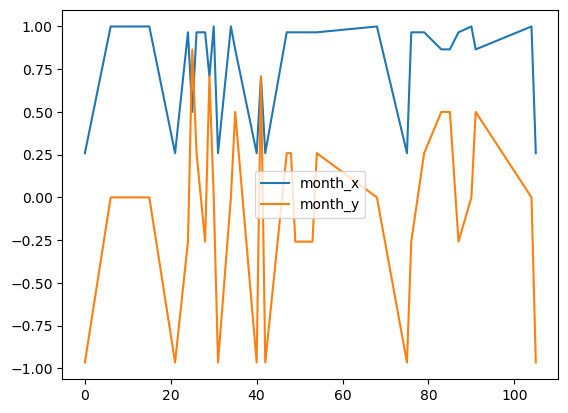

In [10]:
import numpy as np

df['month_x'] = df['month'].apply(lambda x: np.sin(np.pi * int(x) / 12))
df['month_y'] = df['month'].apply(lambda x: np.cos(np.pi * int(x) / 12))
df[['month_x', 'month_y']].plot()

## Dobór cech (Feature Selection)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data,
                       columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
from sklearn.model_selection import train_test_split

X = wine_df.drop(['target'], axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=y)

In [8]:
X_train.var(axis=0)

alcohol                              0.706168
malic_acid                           1.121571
ash                                  0.068913
alcalinity_of_ash                   10.944161
magnesium                          181.744755
total_phenols                        0.415380
flavanoids                           0.959767
nonflavanoid_phenols                 0.014984
proanthocyanins                      0.306186
color_intensity                      6.148125
hue                                  0.053470
od280/od315_of_diluted_wines         0.483311
proline                         106456.321007
dtype: float64

In [11]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X_train)
norm_X_train = norm.transform(X_train)
norm_X_train.var(axis=0)

array([5.40117770e-05, 5.62378250e-06, 2.04503532e-06, 2.20678850e-04,
       2.95900960e-03, 2.34398996e-06, 2.87648562e-06, 1.12609403e-07,
       1.55535583e-06, 1.48274080e-05, 5.42630820e-07, 3.96365065e-06,
       1.02284418e-04])

## "Ręczne" zrzucanie kolumn

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

preds = dt.predict(X_test)
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
f1_score_all

0.871

In [20]:
X_train_sel = X_train.drop(['hue', 'nonflavanoid_phenols'], axis=1)
X_test_sel = X_test.drop(['hue', 'nonflavanoid_phenols'], axis=1)

dt.fit(X_train_sel, y_train)
preds_sel = dt.predict(X_test_sel)
f1_score_sel = round(f1_score(y_test, preds_sel, average='weighted'), 3)
f1_score_sel

0.871

## Eliminacja kolumn o niskiej zmienności

In [23]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1e-7)
selected_features = selector.fit_transform(norm_X_train)
selected_features.shape

(124, 13)

In [24]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = norm_X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
sel_X_train_v1 = selector.transform(X_train_v1)
sel_X_test_v1 = selector.transform(X_test_v1)

dt.fit(sel_X_train_v1, y_train)
kbest_pred = dt.predict(sel_X_test_v1)
f1_score_kbest = round(f1_score(y_test, kbest_pred, average='weighted'), 3)
f1_score_kbest

D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(


0.218

## zrzucanie kolumn testem chi2

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
f1_score_list = []
for k in range(1, 14):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v2, y_train_v2)

    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)

    dt.fit(sel_X_train_v2, y_train_v2)
    kbest_pred = dt.predict(sel_X_test_v2)
    f1_score_kbest = round(f1_score(y_test_v2, kbest_pred, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

print(f1_score_list)

[0.701, 0.776, 0.889, 0.871, 0.871, 0.871, 0.871, 0.871, 0.871, 0.871, 0.871, 0.871, 0.871]


import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(12,6))
x = list(range(1, 14))
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel("Ilość wymiarów wybranych testem chi2")
ax.set_ylabel("F1-score (weighted)")
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index+1, y=value+0.05, s=str(value), ha='center')

plt.tight_layout()

## Recursive Feature ELimination
- korzystając z osobnego estymatora posiadającego coef_ lub feature_importance iteracyjnie odrzucane są kolejne wagi

In [46]:
from sklearn.feature_selection import RFE

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
RFE_selector = RFE(estimator=dt, n_features_to_select=4, step=1)
RFE_selector.fit(X_train_v3, y_train_v3)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=4)

In [47]:
X_train_v3.columns[RFE_selector.support_]

Index(['magnesium', 'flavanoids', 'color_intensity', 'proline'], dtype='object')

In [48]:
sel_X_train_v3 = RFE_selector.transform(X_train_v3)
sel_X_test_v3 = RFE_selector.transform(X_test_v3)
dt.fit(sel_X_train_v3, y_train_v3)
RFE_preds = dt.predict(sel_X_test_v3)
rfe_f1_score = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 3)
print(rfe_f1_score)

0.871


## Select form model
- korzystając z osobnego estymatora posiadającego coef_ lub feature)importance_

In [49]:
from sklearn.feature_selection import SelectFromModel

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
sfm_selector = SelectFromModel(estimator=DecisionTreeClassifier())
sfm_selector.fit(X_train_v4, y_train_v4)

SelectFromModel(estimator=DecisionTreeClassifier())

In [50]:
X_train_v4.columns[sfm_selector.get_support()]

Index(['magnesium', 'flavanoids', 'color_intensity'], dtype='object')

In [51]:
sel_X_train_v4 = sfm_selector.transform(X_train_v4)
sel_X_test_v4 = sfm_selector.transform(X_test_v4)

dt.fit(sel_X_train_v4, y_train_v4)
sfm_preds = dt.predict(sel_X_test_v4)
sfm_f1_score = round(f1_score(y_test_v4, sfm_preds, average='weighted'), 3)
print(rfe_f1_score)

0.871
